<a href="https://colab.research.google.com/github/Lucho90/Estudio/blob/main/Modelo_de_predicci%C3%B3n_de_precios_de_propiedad_ra%C3%ADz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de predicción de precios de propiedad raíz 

El siguiente modelo es un ejercicio en donde se usa un modelo de machine learning para predecir el precio de propiedades del dataset de la inmoviliaria argentina Properati. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Exploración de datos

In [2]:
data= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Primero lo primero, revisar que registros contiene el dataset. Las primeras tres columnas corresponden a fechas correspondientes a las fechas en que se puso en venta el inmueble y cuando se vendió el mismo. A continuación se tienen las columnas de longitud y latitud, seguidas de país, ciudad y barrio.
Seguido contiene los datos de cada propiedad, número de ambientes, cuartos, baños, superficie total y superficie cubierta, precio del inmueble, moneda, dos columnas dedicadas a anuncios publicitando el inmueble, tipo de propiedad al que corresponde el inmueble y, finalmente, tipo de transacción que se realizó.

In [15]:
print('Operaciones: ',data['operation_type'].nunique())
print('Ciudades: ',data['l1'].nunique())

Operaciones:  1
Ciudades:  1


Como tipo de transacción se comprueba que todos los inmuebles del dataset fueron puestos a la venta, además, todos los inmuebles son de Argentina.

In [10]:
print('Fecha minima de start_date: ',data['start_date'].min())
print('Fecha máxima de start_date: ',data['start_date'].max())
print('Fecha minima de end_date: ',data['end_date'].min())
print('Fecha máxima de end_date: ',data['end_date'].max())

Fecha minima de start_date:  2019-01-01
Fecha máxima de start_date:  2020-01-25
Fecha minima de end_date:  2019-01-04
Fecha máxima de end_date:  9999-12-31


Se aprecia que los datos de start_date estan en el rango del año 2019 a enero de 2020 y en cuanto a end_date están desde el año 2019 al 9999, lo que puede suponer que el inmueble no ha sido vendido aun. 

Pero no hay problema. Para este ejercicio, voy a asumir todos los datos como ventas realizadas (después de todo, salvo caidas en el mercado, es poco probable que el precio vaya a variar mucho respecto al que tiene inicialmente).

In [11]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Analicemos ahora las columnas de valores númericos (respecto lat y lon no hay mucho que decir). Los valores máximos de rooms, bedrooms y bathrooms son bastante alto, puede que sean valores correspondientes a propiedades tipo mansion o alguna casa de eventos, pero al fin y al cabo son datos atipicos que podrían perjudiciar el desempeño del modelo (outliers). Por otro lado, los valores minimos pueden ser más razonables si se tienen en cuenta propiedades como locales comerciales o aparta estudios, aunque igual se pueden seguir considerando outliers respecto a los demás valores del dataset.

Observemos a continuación la distribución de los datos acorde al tipo de propiedad:

Resumen de tipo de propiedades: 
 Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64




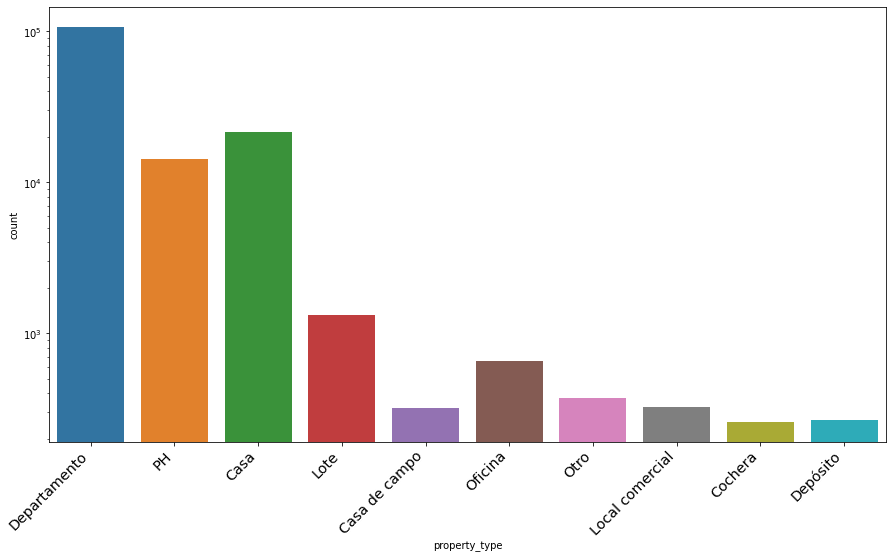

In [13]:
print( 'Resumen de tipo de propiedades:','\n', data['property_type'].value_counts()) #Cantidad de cada tipo de propiedad
print('\n')
plt.figure(figsize=(15,8))
chart=sns.countplot(x = "property_type", data = data);#Grafico de tipo de propiedad
plt.yscale('log')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
sns.set_style()

Este es un primer vistazo muy interesante pues nos muestra que la mayor parte de los datos se concentran en tres tipos de propiedad: Departamento, casa y PH (propiedad horizontal). Ahora bien, veamos que sucede respecto a las ciudades y barrios.

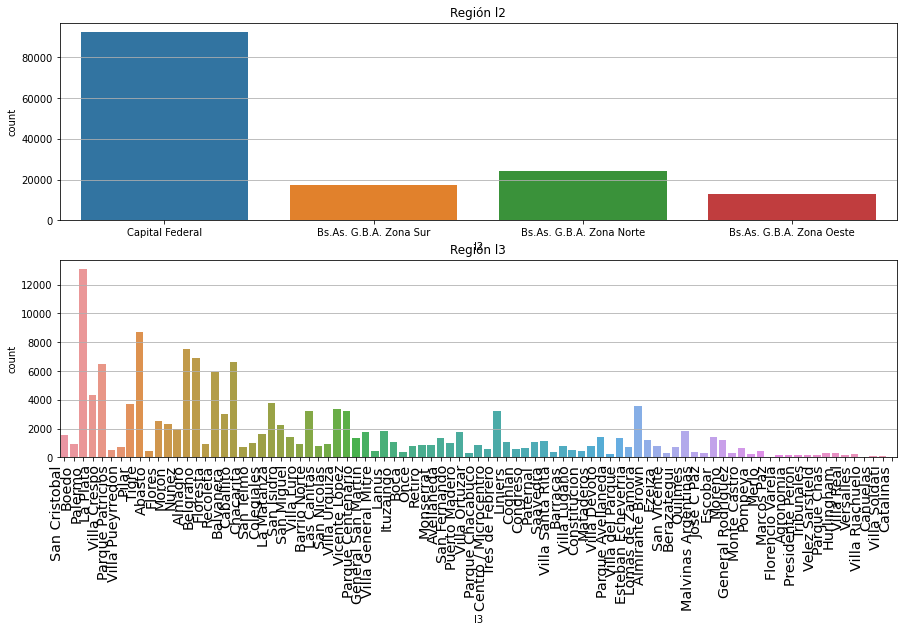

In [16]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1);
plt.title('Región l2')
plt.grid();
sns.countplot(x = 'l2', data = data);


plt.subplot(2,1,2); 
plt.title('Región l3');
plt.grid();
chart2=sns.countplot(x ='l3', data = data);
chart2.set_xticklabels(
    chart2.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
sns.set_style()

En el caso de los datos de las columnas l2 y l3, la mayor parte de datos se concentran en Capital Federal.

In [18]:
data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Para finalizar esta exploración de datos, vemos que los datos faltantes corresponden a la ubicación del inmueble (latitud y longitud), a los baños, superficie total y superficie cubierta.

##Procesamiento de los datos

Luego de esta breve exploración de datos, podemos empezar a transformar nuestros datos y definir que datos sirven y cuales no. Primero que nada, vamos a quedarnos solamente con las propiedades tipo departamento, casa y PH de Capital Federal.

In [17]:
data2=pd.DataFrame(data[data['l2']=='Capital Federal'])
seleccion1=data2[data2['property_type']=='Departamento'] #Clase departamento
seleccion2=data2[data2['property_type']=='Casa'] #Clase casa
seleccion3=data2[data2['property_type']=='PH'] #Clase PH

w=seleccion2.append(seleccion3)

Capital= w.append(seleccion1)
Capital.shape

(91485, 19)

Ahora damos pie a nuestra primera transformación de datos que va a consistir en completar los valores faltantes de latitud y longitud, para ello lo que haremos es agrupar nuestros datos por barrios e imputar en los valores faltantes el promedio de latitud y longitud de cada barrio.

In [19]:
gr=Capital.groupby(["l3"])
t=gr[['l3','lat','lon']].mean()
Capital["lat"].fillna(gr.lat.transform("mean"),inplace=True)
Capital["lon"].fillna(gr.lon.transform("mean"),inplace=True)

A partir de longitud y latitud creamos tres variables (x,y,z) que serviran como coordenadas. Se hace esto con el fin de prevenir una perdida de información en las variables cuando se normalicen los datos más adelante.

In [20]:
lat=Capital['lat']
lon=Capital['lon']
Capital['cord_x'] = np.cos(lat) * np.cos(lon)
Capital['cord_y'] = np.cos(lat) * np.sin(lon)
Capital['cord_z'] = np.sin(lat)

Revisemos la correlación de los datos:

In [21]:
Capital.corr(method='spearman')

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cord_x,cord_y,cord_z
lat,1.000000,-0.121616,0.022258,0.013928,0.109923,0.042984,0.039830,0.304625,0.128557,-0.059792,-1.000000
lon,-0.121616,1.000000,0.052282,0.046345,0.062760,0.049300,0.098100,0.090494,-0.999957,0.997033,0.121616
rooms,0.022258,0.052282,1.000000,0.966571,0.626570,0.838638,0.867520,0.708806,-0.052317,0.053359,-0.022258
bedrooms,0.013928,0.046345,0.966571,1.000000,0.621037,0.818636,0.848947,0.689359,-0.046444,0.046897,-0.013928
bathrooms,0.109923,0.062760,0.626570,0.621037,1.000000,0.685693,0.700590,0.700204,-0.061971,0.071276,-0.109923
surface_total,0.042984,0.049300,0.838638,0.818636,0.685693,1.000000,0.957517,0.835156,-0.049137,0.052301,-0.042984
surface_covered,0.039830,0.098100,0.867520,0.848947,0.700590,0.957517,1.000000,0.836027,-0.097884,0.101574,-0.039830
price,0.304625,0.090494,0.708806,0.689359,0.700204,0.835156,0.836027,1.000000,-0.088224,0.112474,-0.304625
cord_x,0.128557,-0.999957,-0.052317,-0.046444,-0.061971,-0.049137,-0.097884,-0.088224,1.000000,-0.996368,-0.128557
cord_y,-0.059792,0.997033,0.053359,0.046897,0.071276,0.052301,0.101574,0.112474,-0.996368,1.000000,0.059792


Haciendo uso de la regla de las tres sigmas, eliminamos outliers. En este caso eliminaremos solo los datos que esten 1.5 sigmas por encima del promedio. Para eliminar los datos atipicos se crea un ciclo de for en el que se elimina todo lo mayor a 1.5 sigmas de cada uno de los siguientes valores ordenados según su correlación al precio, eliminando primero los menos correlacionados.

In [22]:
k=[ 'bathrooms','rooms','surface_total','surface_covered','price'] #Solo accionar una vez.,'rooms'

for k in k:
  maximo= Capital[k].median() +1.5*Capital[k].std()
  Capital= Capital.drop(Capital[Capital[k]>maximo].index)
  
print(Capital.shape)

(70298, 22)


Ahora armamos un dataframe con los datos que van a alimentar el modelo:

In [23]:
Capital=pd.DataFrame(Capital,
                     columns=['price','l3',
                              'property_type',
                              'bathrooms','rooms',
                              'surface_covered','surface_total',
                              'cord_x','cord_y','cord_z'])

Definido esto y para que el modelo "entienda" los datos no numericos, transformamos las columnas de barrio (l3) y tipo de propiedad a valores booleanos (0 y 1).

In [24]:
Capital = pd.get_dummies(Capital,columns=['l3','property_type'],drop_first=True)

Ahora definimos nuestras variables dependiente e independiente:

In [25]:
X= Capital.iloc[:,1:].values
y= Capital.iloc[:,0].values

Con el fin de volver el modelo lo más eficiente posible, normalizamos la variable X, es decir, transformamos todos los datos para que queden en valores entre 0 y 1 sin perder escala entre ellos.

In [26]:
from sklearn.preprocessing import StandardScaler #Normalización de los datos
sc = StandardScaler()
X = sc.fit_transform(X)

En el siguiente paso imputaremos los demás valores faltantes haciendo uso del KNNImputer, lo que hará esta linea de codigo es asignar al dato faltante el valor que tenga en ese dato para la propiedad que sea más parecida.

In [27]:
from sklearn.impute import KNNImputer #Imputación de valores faltantes
imputer = KNNImputer(n_neighbors=3)
X= imputer.fit_transform(X)

Listo, tenemos nuestros datos preparados. Podemos proceder a dividirlos en datos para entrenar el modelo y datos para testearlo. En este caso el tamaño de los datos para entrenar el modelo será del 75% del total.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, )

##Modelo random forest regressor

El modelo seleccionado para este ejercicio de predicción será un random forest regressor. Y los parametros seleccionados en el modelo son generados a partir de varias iteraciones (una forma elegante de decir ensayo y error).

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Tuneamos el modelo y seguido a ello lo entrenamos con nuestros datos.

In [30]:
rdf = RandomForestRegressor(n_estimators=350, oob_score = True, max_depth=25,max_samples=0.3)
rdf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=0.3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=350, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

Ahora, grafiquemos el comportamiento del modelo y veamos cúal fue su rmse (root-mean-square error, raíz del error cuadrático medio).

Modelo de random forest regressor
Raíz del error cuadrático medio en Train: 18528.40907281975
Raíz del error cuadrático medio en Test: 24776.603284264675


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


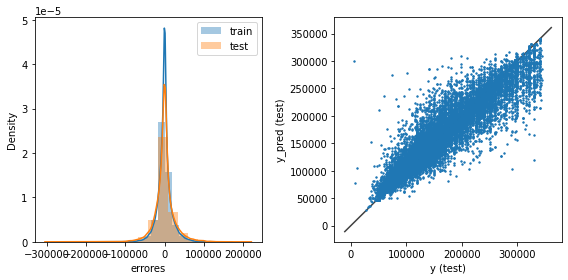

In [31]:
y_train_pred = rdf.predict(X_train)
y_test_pred = rdf.predict(X_test)

print('Modelo de random forest regressor')

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
  np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
  np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

El rmse nos arroja un valor en las unidades que se busca predecir, este valor es el promedio del error que arrojó el módelo, es decir, en este caso en particular el modelo se equivoca aproximadamente 24700 dollares (por debajo o por encima del precio real) cuando predice el valor de una propiedad.



En la primera gráfica se compara el desempeño del modelo cuando se le introducen los datos de entrenamiento vs los datos de testeo. Una diferencia entre estos resultados muy grandes habría querido decir que el modelo se sobreajustó o subajustó a los datos. Para este caso la diferencia no es mucha, por lo que nuestro modelo no está muy mal.

El gráfico de la derecha nos muestra el error en el modelo, siendo que cada uno de los puntos corresponde a una propiedad y la predicción correcta corresponde a la cercanía de los puntos a la recta de la gráfica. Es decir, los puntos que más se alejan de la gráfica son las predicciones con mayor rmse. En este caso, si bien varias propiedades se alejan de la linea, no se forman nubes de datos densas muy lejos del módelo; con ello se puede afirmar que el error en general no es tan alto y se ve afectado por propiedades que puedan ser consideradas outliers.